**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5053 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 5**
Preprocesamiento de datos

---

*   NOMBRE: Carlos Humberto Galvan Perales
*   MATRÍCULA: A01797969

En esta actividad trabajarás con el archivo `heart_disease.csv`, basado en un conjunto de datos sobre pacientes y variables clínicas relacionadas con enfermedades cardíacas, disponible en Kaggle.

Los datos fueron recopilados para analizar la presencia de enfermedades cardíacas en los pacientes y contienen información demográfica, clínica y resultados de pruebas diagnósticas. Los indicadores incluidos son:

* `id`: Identificador único de cada paciente
* `age`: Edad del paciente en años
* `origin`: Lugar de estudio
* `sex`: Masculino / Femenino
* `cp`: Tipo de dolor torácico (angina típica, angina atípica, no anginal, asintomático)
* **`trestbps`: Presión arterial en reposo (en mm Hg al ingreso al hospital)**
* `chol`: Colesterol sérico en mg/dl
* `fbs`: Si el azúcar en ayunas > 120 mg/dl
* `restecg`: Resultados del electrocardiograma en reposo (normal, anomalía ST-T, hipertrofia ventricular izquierda)
* **`thalch`: Frecuencia cardíaca máxima alcanzada**
* **`exang`: Angina inducida por ejercicio (Verdadero / Falso)**
* **`oldpeak`: Depresión del segmento ST inducida por ejercicio respecto al reposo**
* `slope`: Pendiente del segmento ST en el pico de ejercicio
* `ca`: Número de vasos principales coloreados por fluoroscopía (0 - 3)
* `thal`: Resultado de la prueba de perfusión cardíaca (normal, defecto fijo, defecto reversible)
* `num`: Indica si el paciente tiene o no enfermedad cardíaca, o el grado de enfermedad (0 = sano, 1 - 4 = enfermedad) Es la variable de salida o *target*, es decir, la que se pretende predecir más adelante al construir el modelo.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from matplotlib.colors import ListedColormap
from scipy.stats import ttest_ind, chi2_contingency, skew

## Funciones definidas

In [24]:
# Funciones definidas
def Diagnose_MV_Numerical(df, str_att_name, BM_MV):
    # Usar base_colors proporcionados
    base_colors = ['#1c309d', '#dbe73f']
    MV_labels = {True: 'With Missing Values', False: 'Without Missing Values'}

    # Preparar datos
    labels = []
    box_sr = pd.Series('', index=BM_MV.unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])

    att_range = (df[str_att_name].min(), df[str_att_name].max())

    # Crear figura con subplots:
    fig, axs = plt.subplots(1, 3, figsize=(15, 5)) # 1 fila, 3 columnas: boxplot + 2 histogramas

    # Boxplot en la primera subgráfica
    # Usar color personalizado en boxplot
    bplot = axs[0].boxplot(box_sr, vert=False, patch_artist=True)
    for patch, color in zip(bplot['boxes'], base_colors):
        patch.set_facecolor(color)
    axs[0].set_yticks([1, 2])
    axs[0].set_yticklabels(labels, fontweight='bold')
    axs[0].set_xlabel(str_att_name, fontweight='bold')
    axs[0].set_title('Boxplot', fontweight='bold')

    # Histogramas en las segunda y tercera subgráfica
    for i, poss in enumerate(BM_MV.unique()):
        BM = BM_MV == poss
        axs[i+1].hist(
            df[BM][str_att_name].dropna(),
            bins=20,
            color=base_colors[i % len(base_colors)],
            edgecolor='black'
        )
        axs[i+1].set_xlim(att_range)
        axs[i+1].set_xlabel(str_att_name, fontweight='bold')
        axs[i+1].set_title(MV_labels[poss], fontweight='bold')

    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()
    p_value = ttest_ind(group_1_data, group_2_data).pvalue
    
    # Mostrar el p-valor en el gráfico (debajo de los subplots)
    fig.suptitle('p-value of t-test: {:.4g}'.format(p_value), fontsize=14, fontweight='bold', y=1.03)

    plt.tight_layout()
    plt.show()

In [20]:
def Diagnose_MV_Categorical(df, str_att_name, BM_MV):
    base_colors = ['#1c309d', '#dbe73f']
    MV_labels = {True: 'With Missing Values', False: 'Without Missing Values'}

    # Preparar datos
    labels = []
    bar_data = []
    categories = sorted(df[str_att_name].dropna().unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        value_counts = df[BM][str_att_name].value_counts().reindex(categories, fill_value=0)
        bar_data.append(value_counts)
        labels.append(MV_labels[poss])

    # Crear figura con subplots:
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # 1. Gráfico de barras agrupado
    grouped_data = pd.DataFrame(bar_data, index=labels)
    grouped_data = grouped_data.T
    grouped_data.plot(kind='bar', ax=axs[0], color=base_colors, edgecolor='black')
    axs[0].set_title('Grouped Barplot', fontweight='bold')
    axs[0].set_xlabel(str_att_name, fontweight='bold')
    axs[0].set_ylabel('Count', fontweight='bold')
    axs[0].legend(fontsize=10, title='Group')

    # 2-3. Barras individuales por grupo
    for i, value_counts in enumerate(bar_data):
        value_counts.plot.bar(
            ax=axs[i+1], 
            color=base_colors[i % len(base_colors)],
            edgecolor='black'
        )
        axs[i+1].set_title(labels[i], fontweight='bold')
        axs[i+1].set_xlabel(str_att_name, fontweight='bold')
        axs[i+1].set_ylabel('Count', fontweight='bold')
        axs[i+1].set_xticklabels(categories, rotation=45, ha='right', fontweight='bold')

    plt.tight_layout()

    # p-value (Chi-squared test)
    contingency_table = pd.crosstab(BM_MV, df[str_att_name])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    fig.suptitle('p-value of Chi-squared test: {:.4g}'.format(p_value), fontsize=14, fontweight='bold', y=1.05)

    plt.show()

In [ ]:
def imputation_strategy(series):
    """Decide la estrategia apropiada de imputación."""
    # Categóricas puras o tipo 'object'
    if series.dtype == 'O' or str(series.dtype).startswith('category'):
        return 'most_frequent'
    # Pocas categorías y dtype numérico -> probablemente codificada categórica
    if series.nunique(dropna=True) <= 10:
        return 'most_frequent'
    # Numérica continua
    if series.dtype.kind in 'biufc':
        # Si hay muchos outliers (skew fuerte), mejor mediana
        # Considerar skewness alto > |0.8| como regla simple
        data = series.dropna()
        if data.shape[0] < 2:
            return 'mean'  # fallback
        s = skew(data)
        if abs(s) > 0.8:
            return 'median'
        else:
            return 'mean'
    # Fallback
    return 'most_frequent'

1. Descarga el archivo: `heart_disease.csv` y guarda, en un dataframe (`cardio_df`), todos sus registros.
* Haz que la columna `id` sea el índice del dataframe.
* Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas de texto?
* Determina la cantidad de valores únicos por columna.

In [3]:
# Import DataFrame
cardio_df = pd.read_csv("heart_disease.csv",index_col= "id")
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   sex       918 non-null    object 
 2   origin    918 non-null    object 
 3   cp        918 non-null    object 
 4   trestbps  859 non-null    float64
 5   chol      888 non-null    float64
 6   fbs       829 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    863 non-null    float64
 9   exang     863 non-null    object 
 10  oldpeak   856 non-null    float64
 11  slope     610 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       918 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 114.8+ KB


In [4]:
# Contar cuántas columnas son numéricas y cuántas son de texto
num_cols = cardio_df.select_dtypes(include=[np.number]).columns
text_cols = cardio_df.select_dtypes(include=["object"]).columns

print(f"Número de columnas numéricas: {len(num_cols)}")
print(f"Número de columnas de texto: {len(text_cols)}")


Número de columnas numéricas: 7
Número de columnas de texto: 8


In [5]:
# Mostrar la cantidad de valores únicos por columna, ordenados de mayor a menor
unique_values = cardio_df.nunique().sort_values(ascending=False)
print("Cantidad de valores únicos por columna (ordenados de mayor a menor):")
print(unique_values)


Cantidad de valores únicos por columna (ordenados de mayor a menor):
chol        216
thalch      119
trestbps     60
oldpeak      53
age          50
num           5
cp            4
origin        4
ca            4
slope         3
restecg       3
thal          3
sex           2
fbs           2
exang         2
dtype: int64


2. Examina las variables numéricas que presentan pocos valores únicos, ya que esto puede indicar que en realidad se tratan de variables categóricas codificadas como números.
* Si existen casos de este tipo, conviértelas a categóricas. Antes de hacerlo, revisa sus descripciones para determinar si son ordinales o nominales y, si son ordinales, establece el orden correcto de las categorías.

In [6]:
num_cols

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')

In [7]:
cardio_df[num_cols]

,age,trestbps,chol,thalch,oldpeak,ca,num
id,,,,,,,
1,63,145.0,233.0,150.0,2.3,0.0,0
2,67,160.0,286.0,108.0,1.5,3.0,2
3,67,120.0,229.0,129.0,2.6,2.0,1
4,37,130.0,250.0,187.0,3.5,0.0,0
5,41,130.0,204.0,172.0,1.4,0.0,0
...,...,...,...,...,...,...,...
916,54,127.0,333.0,154.0,0.0,NaN,1
917,62,NaN,139.0,NaN,NaN,NaN,0
918,55,122.0,223.0,100.0,0.0,NaN,2


In [8]:
# Identificar variables numéricas con pocos valores únicos (umbral arbitrario, por ejemplo, <=6)
threshold = 6
few_uniques = [col for col in num_cols if cardio_df[col].nunique() <= threshold]

print("Variables numéricas con pocos valores únicos:", few_uniques)

# Analizar cuáles podrían ser categóricas y si son ordinales o nominales
for col in few_uniques:
    print(f"\nColumna: {col}")
    print("Valores únicos:", sorted(cardio_df[col].unique()))
    print("Frecuencia de valores:")
    print(cardio_df[col].value_counts())
    # Aquí podrías analizar si existe un significado de orden, por ejemplo por la documentación


Variables numéricas con pocos valores únicos: ['ca', 'num']

Columna: ca
Valores únicos: [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(nan)]
Frecuencia de valores:
ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64

Columna: num
Valores únicos: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Frecuencia de valores:
num
0    411
1    263
2    109
3    107
4     28
Name: count, dtype: int64


In [9]:
# Convertir la columna "ca" a categórica ordinal de 0 a 3
cardio_df["ca"] = pd.Categorical(cardio_df["ca"], categories=[0, 1, 2, 3], ordered=True)
# Convertir la columna "num" a categórica ordinal de 0 a 4
cardio_df["num"] = pd.Categorical(cardio_df["num"], categories=[0, 1, 2, 3, 4], ordered=True)

3. Obtén las estadísticas descriptivas de las variables, realizando el análisis por separado para las variables numéricas y las categóricas.
* Para las numéricas, incluye el sesgo y la curtosis.
* Para las categóricas, imprime además las tablas de frecuencia.

In [10]:
# Quitamos 'ca' y 'num' de las columnas numéricas y las agregamos a las categóricas
num_cols = [col for col in num_cols if col not in ['ca', 'num']]
cat_cols = list(text_cols) + ['ca', 'num']

In [11]:
# Estadísticas descriptivas básicas
desc_num = cardio_df[num_cols].describe().T

# Calcular sesgo y curtosis para cada variable numérica
desc_num['skew'] = cardio_df[num_cols].skew()
desc_num['kurtosis'] = cardio_df[num_cols].kurtosis()

print("Estadísticas descriptivas de variables numéricas (incluye sesgo y curtosis):")
display(desc_num)


Estadísticas descriptivas de variables numéricas (incluye sesgo y curtosis):


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
age,918.0,53.530501,9.412783,28.0,47.0,54.0,60.0,77.0,-0.193710,-0.382511
trestbps,859.0,132.294529,18.535875,80.0,120.0,130.0,140.0,200.0,0.630411,0.632992
chol,888.0,242.189189,53.424806,85.0,216.0,223.0,268.0,603.0,1.640672,6.573848
thalch,863.0,137.528389,25.950226,60.0,120.0,140.0,157.0,202.0,-0.209319,-0.483939
oldpeak,856.0,0.880607,1.091840,-2.6,0.0,0.5,1.5,6.2,1.037990,1.119834


In [12]:
cardio_df[cat_cols].describe().T


,count,unique,top,freq
sex,918,2,Male,724
origin,918,4,Cleveland,304
cp,918,4,asymptomatic,495
fbs,829,2,False,691
restecg,918,3,normal,551
exang,863,2,False,526
slope,610,3,flat,345
thal,434,3,normal,196
ca,309,4,0,181
num,918,5,0,411


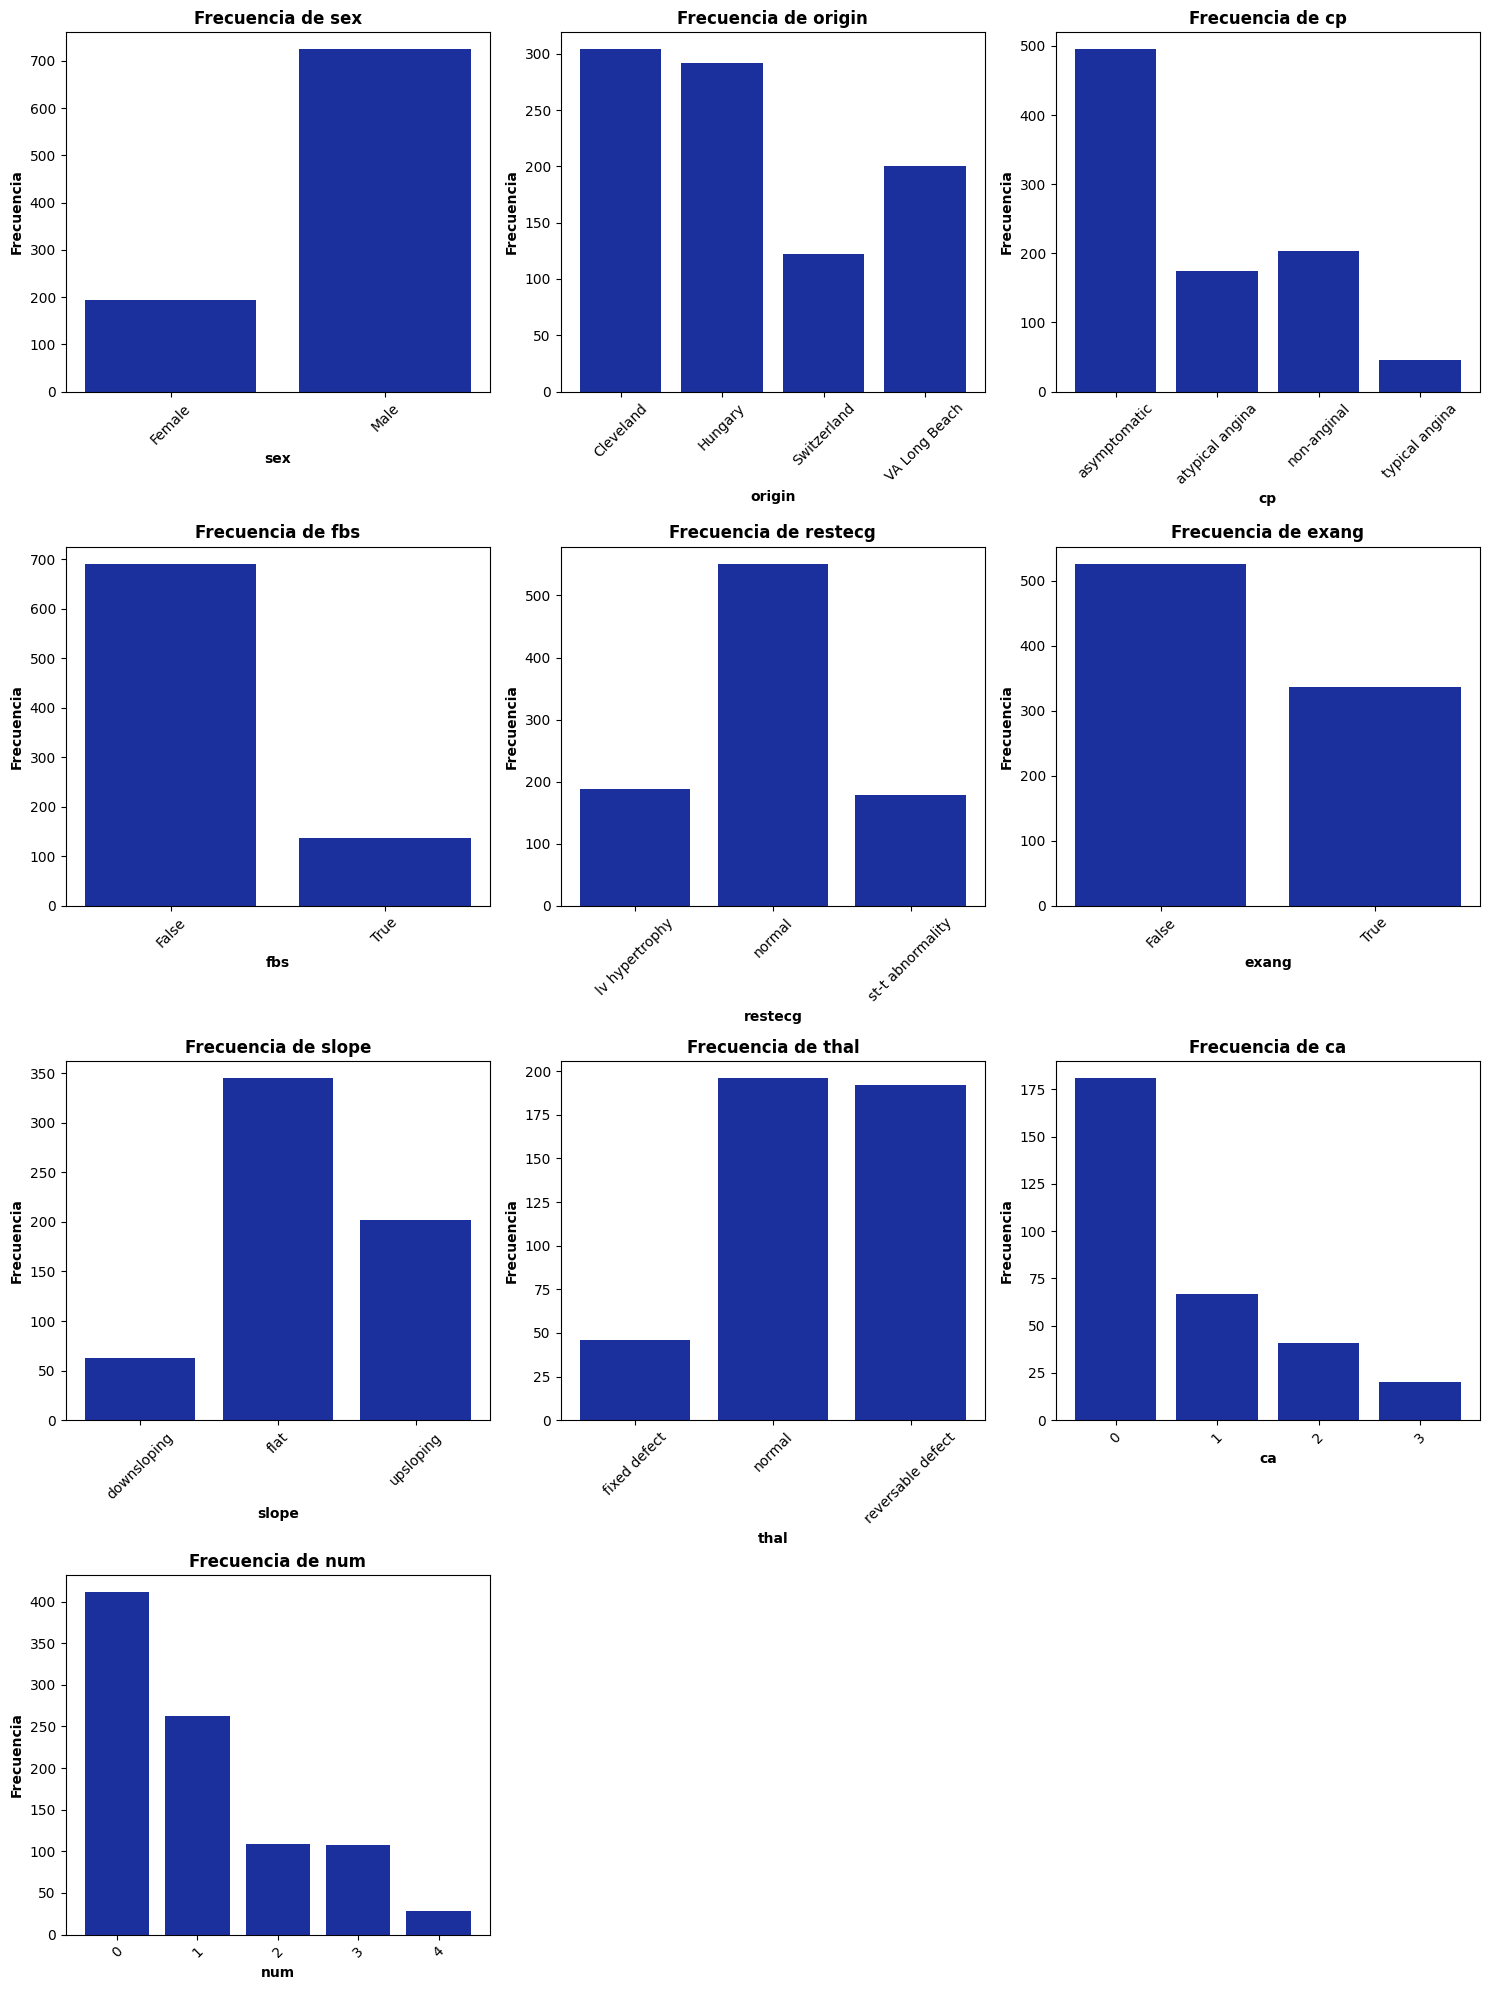

In [13]:
fig_cols = 3
fig_rows = (len(cat_cols) + fig_cols - 1) // fig_cols  # Calcula el número de filas necesarias
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(5 * fig_cols, 5 * fig_rows))
axes = axes.flatten()  # Para indexar fácilmente

for idx, col in enumerate(cat_cols):
    value_counts = cardio_df[col].value_counts().sort_index()
    axes[idx].bar(value_counts.index.astype(str), value_counts.values, color='#1c309d')
    axes[idx].set_title(f'Frecuencia de {col}', fontweight='bold')
    axes[idx].set_xlabel(col, fontweight='bold')
    axes[idx].set_ylabel('Frecuencia', fontweight='bold')
    axes[idx].tick_params(axis='x', labelrotation=45)  # Rotar etiquetas del eje x 45 grados

# Eliminar ejes sin datos si cat_cols no llena todas las subplots
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


4. Calcula el porcentaje de valores faltantes en cada columna.
* Elimina aquellas columnas cuyo porcentaje de valores faltantes supere el 30%.
* Crea un mapa de calor que visualice la distribución de los valores faltantes en todas las columnas restantes.
* Algunas variables presentan valores faltantes de manera simultánea; es decir, en el mapa se pueden identificar filas donde varias están ausentes al mismo tiempo. Enumera cuáles son dichas variables e investiga si esta concurrencia tiene sentido desde un punto de vista médico o clínico.

In [14]:
# Calcular el porcentaje de valores faltantes por columna
missing_percentages = (cardio_df.isnull().mean() * 100).round(2)

# Mostrar el porcentaje de valores faltantes
print("Porcentaje de valores faltantes por columna:")
print(missing_percentages)

# Eliminar columnas con más del 30% de valores faltantes
cols_to_drop = missing_percentages[missing_percentages > 30].index.tolist()
print("\nColumnas eliminadas por superar el 30% de valores faltantes:", cols_to_drop)
cardio_df = cardio_df.drop(columns=cols_to_drop)

Porcentaje de valores faltantes por columna:
age          0.00
sex          0.00
origin       0.00
cp           0.00
trestbps     6.43
chol         3.27
fbs          9.69
restecg      0.00
thalch       5.99
exang        5.99
oldpeak      6.75
slope       33.55
ca          66.34
thal        52.72
num          0.00
dtype: float64

Columnas eliminadas por superar el 30% de valores faltantes: ['slope', 'ca', 'thal']


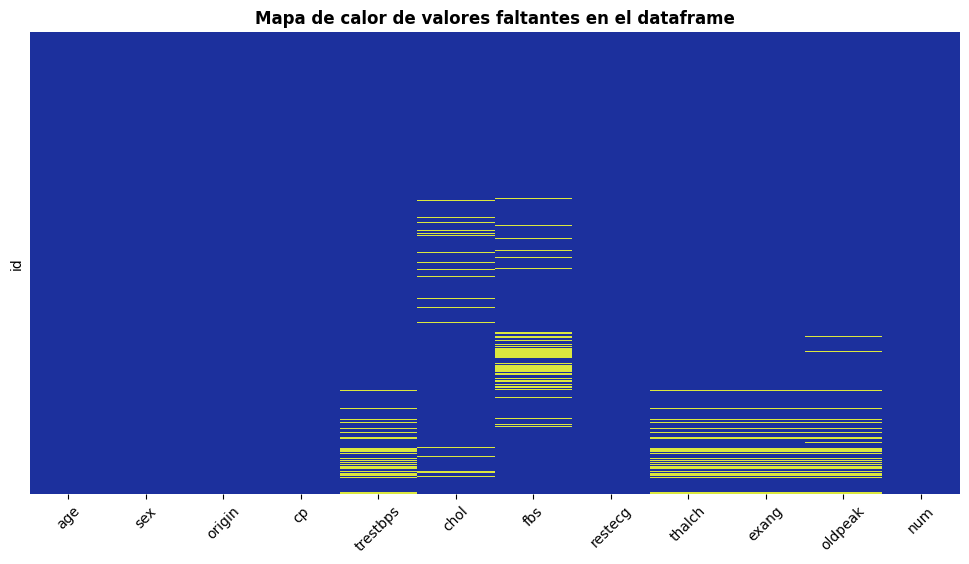

[INFO] Variables más frecuentemente ausentes simultáneamente en filas:
oldpeak     58
trestbps    56
exang       55
thalch      55
fbs          4
chol         3
dtype: int64

Investiga si esta concurrencia tiene sentido desde un punto de vista médico/clínico consultando la descripción de las variables.


In [ ]:
# Crear un mapa de calor que visualiza la distribución de valores faltantes usando base_colors personalizados
base_colors = ['#1c309d', '#dbe73f']

plt.figure(figsize=(12, 6))
# Mapa de calor: 0 (no faltante) asignado al primer color, 1 (faltante) al segundo
ax = sns.heatmap(
    cardio_df.isnull(),
    cbar=False,
    yticklabels=False,
    cmap=ListedColormap(base_colors),
    edgecolor='black'
)
plt.title("Mapa de calor de valores faltantes en el dataframe", fontweight='bold')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x 45 grados
plt.show()

# Identificar filas donde varias columnas presentan valores faltantes simultáneamente
missing_rows = cardio_df.isnull().sum(axis=1)
simultaneous_missing = cardio_df[missing_rows > 1]

if not simultaneous_missing.empty:
    # Encontrar las columnas que más frecuentemente están ausentes al mismo tiempo
    cols_with_simultaneous_missing = simultaneous_missing.isnull().sum().sort_values(ascending=False)
    cols_with_simultaneous_missing = cols_with_simultaneous_missing[cols_with_simultaneous_missing > 0]
    print("[INFO] Variables más frecuentemente ausentes simultáneamente en filas:")
    print(cols_with_simultaneous_missing)
    print(
        "\nInvestiga si esta concurrencia tiene sentido desde un punto de vista médico/clínico consultando la descripción de las variables."
    )
else:
    print("No se identificaron filas con faltantes concurrentes en más de una variable.")



### Análisis Clínico de la Concurrencia de Valores Faltantes

**Variables Afectadas:**
- trestbps: Presión arterial en reposo (mm Hg)
- thalach: Frecuencia cardíaca máxima alcanzada
- exang: Angina inducida por ejercicio (V/F)
- oldpeak: Depresión del segmento ST inducida por ejercicio

**Posibles Causas**

1. Prueba de Esfuerzo 

Todas estas variables están relacionadas con la prueba de esfuerzo. Cuando estas variables están ausentes simultáneamente,exista probabilidad que:

- El paciente no pudo completar la prueba de esfuerzo
- La prueba fue contraindicada médicamente
- Hubo problemas técnicos durante la medición

2. Contraindicaciones Clínicas Comunes

Las pruebas de esfuerzo tienen contraindicaciones que explican estos valores faltantes:

- Enfermedades cardiovasculares severas no controladas
- Arritmias graves
- Insuficiencia cardíaca descompensada
- Enfermedad pulmonar severa
- Limitaciones físicas o discapacidades
- Edad avanzada con fragilidad

3. Implicaciones Clínicas

Esta concurrencia es clínicamente significativa porque:

- Indica pacientes con mayor riesgo cardiovascular
- Sugiere enfermedad más avanzada o complicada
- Puede indicar comorbilidades múltiples
- Representa casos donde el pronóstico es menos favorable

**Conclusión:**

La concurrencia de valores faltantes en estas variables específicas refleja realidad clínica y no es necesariamente un error de datos. Puede representar pacientes con características clínicas particulares que requieren atención especial en el análisis, ya que esta información en sí misma es predictiva del estado de salud cardiovascular del paciente.


In [16]:
# Crear la columna 'MMVA' que indica True si todas las columnas 'trestbps', 'thalch', 'exang' y 'oldpeak' están ausentes simultáneamente (NaN) en una fila
cardio_df['MMVA'] = cardio_df[['trestbps', 'thalch', 'exang', 'oldpeak']].isnull().all(axis=1)


Análisis de 'age' para grupos MMVA ['trestbps','thalch','exang','oldpeak'] Faltantes Simultaneos


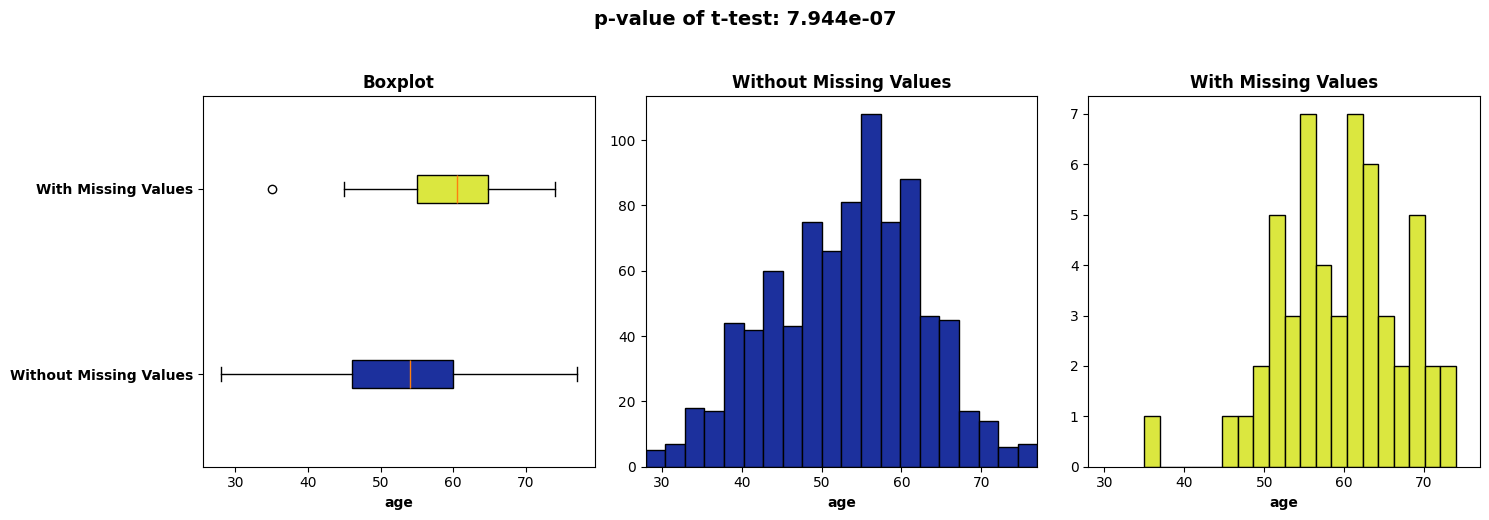


Análisis de 'chol' para grupos MMVA ['trestbps','thalch','exang','oldpeak'] Faltantes Simultaneos


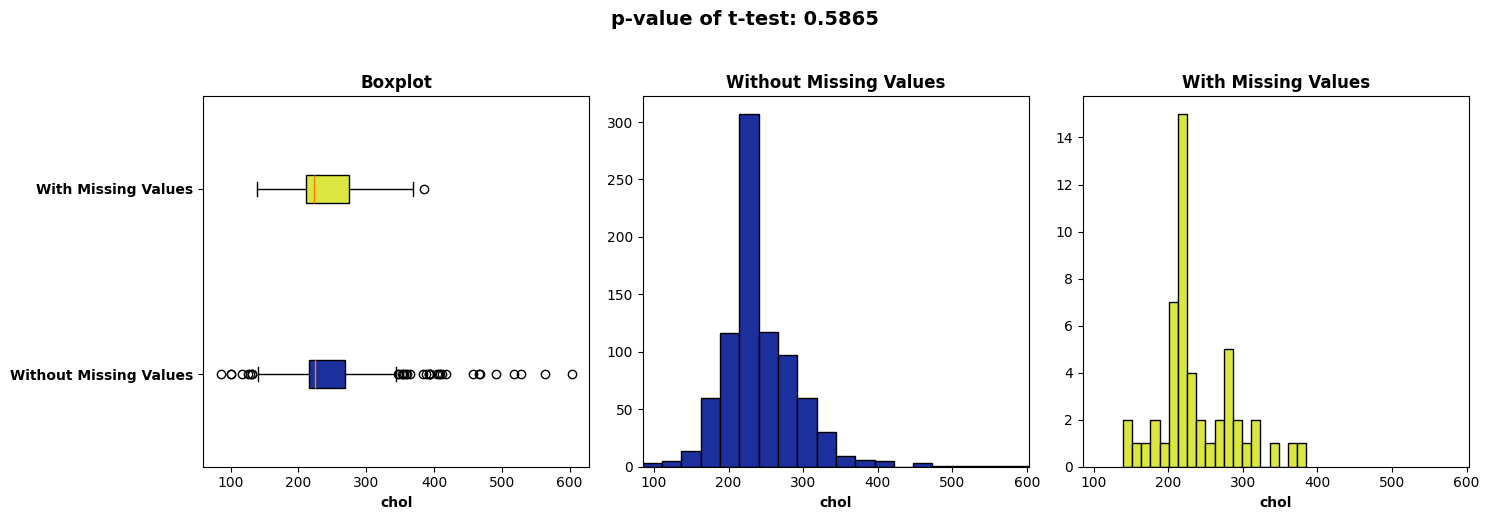

In [17]:
# Definir las columnas numéricas a analizar (excluyendo MMVA, 'trestbps', 'thalch', 'exang', 'oldpeak' y cualquier identificador si existe)
exclude_cols = ['MMVA', 'trestbps', 'thalch', 'exang', 'oldpeak']
numerical_columns = [col for col in cardio_df.select_dtypes(include='number').columns if col not in exclude_cols]

# Para cada variable numérica, comparar la distribución en ambos grupos de MMVA
for col in numerical_columns:
    print(f"\nAnálisis de '{col}' para grupos MMVA ['trestbps','thalch','exang','oldpeak'] Faltantes Simultaneos")
    # Llama a la función para comparar entre quienes tienen todos los faltantes simultáneos y quienes no
    Diagnose_MV_Numerical(cardio_df, col, cardio_df['MMVA'])


* **`trestbps`: Presión arterial en reposo (en mm Hg al ingreso al hospital)**
* **`thalch`: Frecuencia cardíaca máxima alcanzada**
* **`exang`: Angina inducida por ejercicio (Verdadero / Falso)**
* **`oldpeak`: Depresión del segmento ST inducida por ejercicio respecto al reposo**

> Podemos observar que la variable con mayor correlacion o relevancia con base en p-value es la edad pudiendo confirmar nuestras hipotesis anteriores

5. Si centramos el análisis en una de las variables identificadas en el ejercicio anterior, se puede suponer que los hallazgos obtenidos podrían ser aplicables a las demás variables que presentan un patrón similar.

* ¿Tendrán los valores faltantes de `thalch` relación con alguna otra variable? Analízalo considerando las siguientes columnas:
  *   Numéricas: `age`, `chol`
  *   Categóricas: `restecg`, `cp`

Para ello deberás dividir cada columna en dos grupos: con / sin faltantes en `thalch` y utilizar métodos gráficos y pruebas de hipótesis para ver si hay diferencias significativas.
* Incluye las conclusiones del análisis con los resultados obtenidos.
* Justifica si el mecanismo de faltantes de `thalch` es MCAR (*Missing Completely at Random*) o MAR (*Missing at Random*).

**NOTA**. Puedes reutilizar las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip. Revisa nuevamente cómo utilizarlas.


Análisis de 'age' según presencia de valores faltantes en 'thalch':


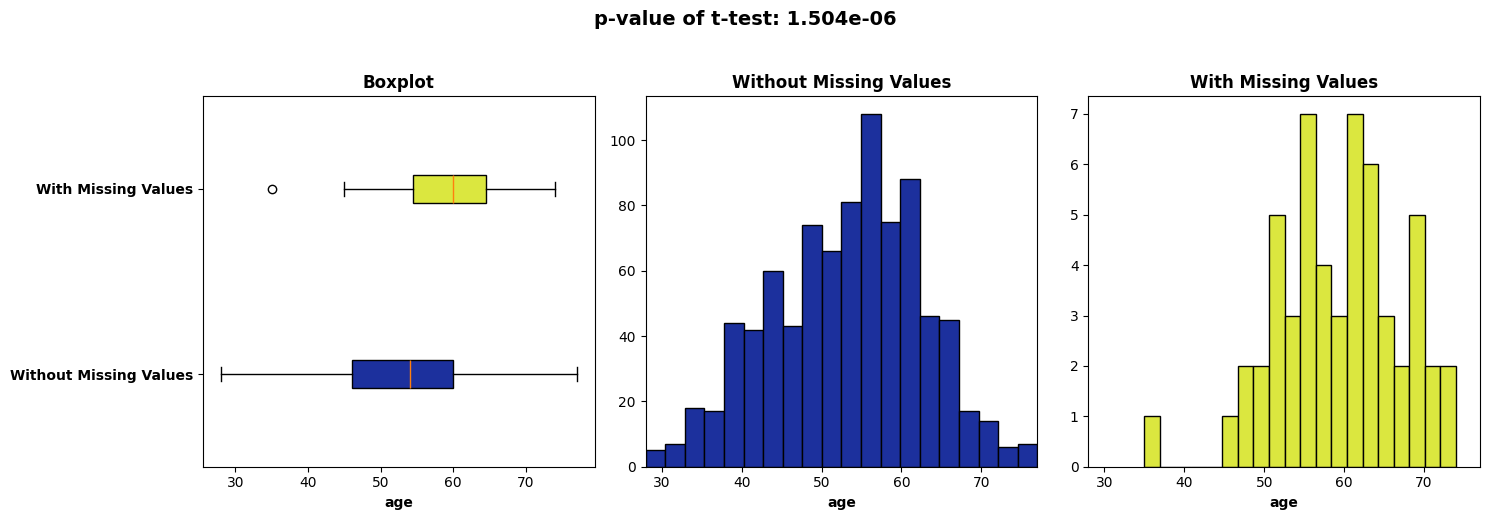


Análisis de 'chol' según presencia de valores faltantes en 'thalch':


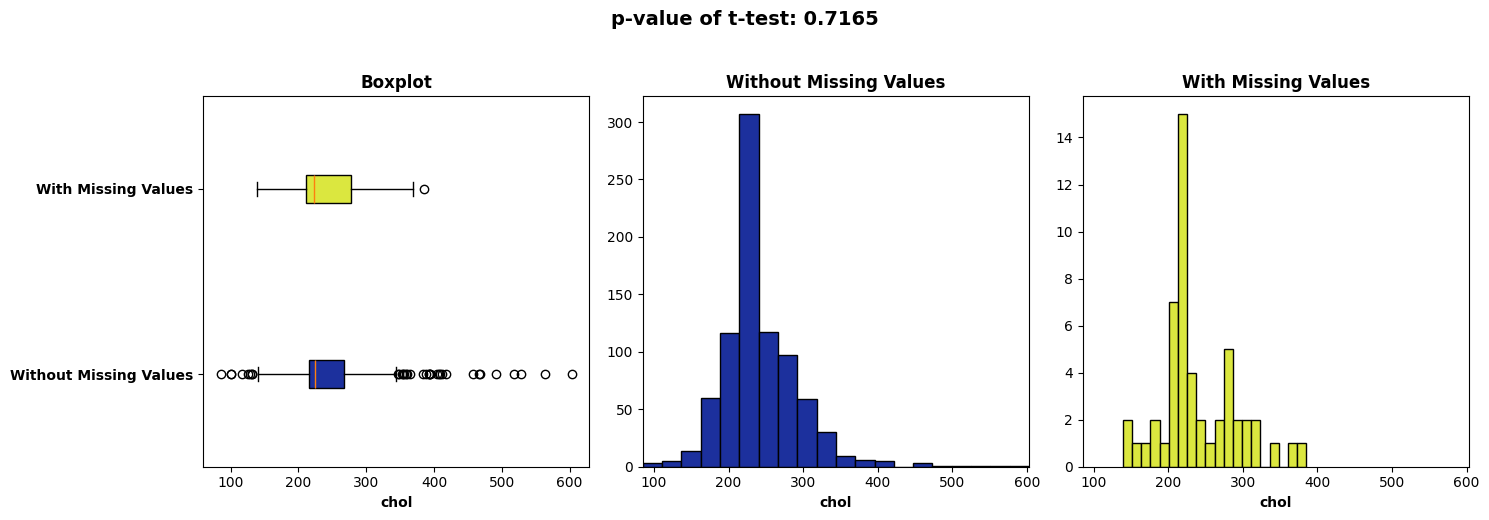

In [ ]:
# Análisis de la relación entre los valores faltantes de 'thalch' y otras variables
# Creamos una variable booleana que indica si hay valor faltante en 'thalch'
thalch_na = cardio_df['thalch'].isna()

# Variables numéricas a analizar
num_vars = ['age', 'chol']

for col in num_vars:
    print(f"\nAnálisis de '{col}' según presencia de valores faltantes en 'thalch':")
    Diagnose_MV_Numerical(cardio_df, col, thalch_na)

1. **Variable `age` (Edad)**

- **p-value t-test**: 1.504e-06 (extremadamente significativo)
- **Conclusión**: Existe una diferencia estadísticamente muy significativa en la edad promedio entre pacientes con y sin valores faltantes en thalach
- **Interpretación**: Los pacientes con valores faltantes en thalach tienden a ser significativamente mayores

2. **Variable `chol` (Colesterol)**

- **p-value t-test**: 0.7165 (no significativo)
- **Conclusión**: No hay diferencia estadísticamente significativa en los niveles de colesterol entre los grupos
- **Interpretación**: Los valores faltantes en thalach NO están relacionados con los niveles de colesterol


Análisis de 'restecg' según presencia de valores faltantes en 'thalch':


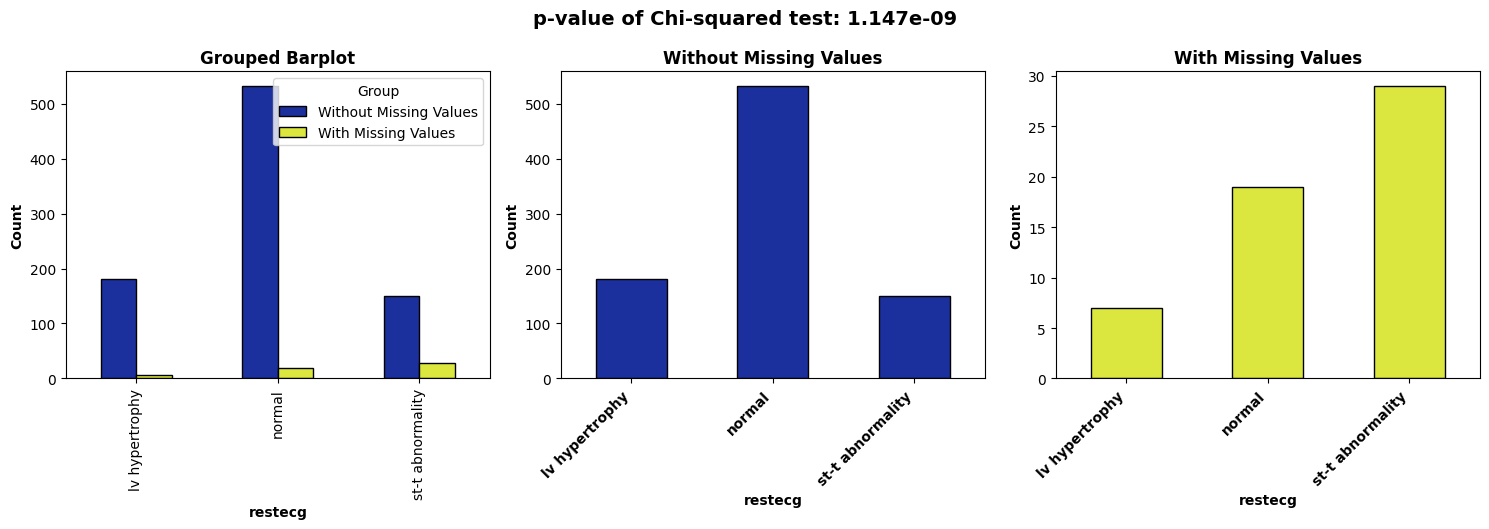


Análisis de 'cp' según presencia de valores faltantes en 'thalch':


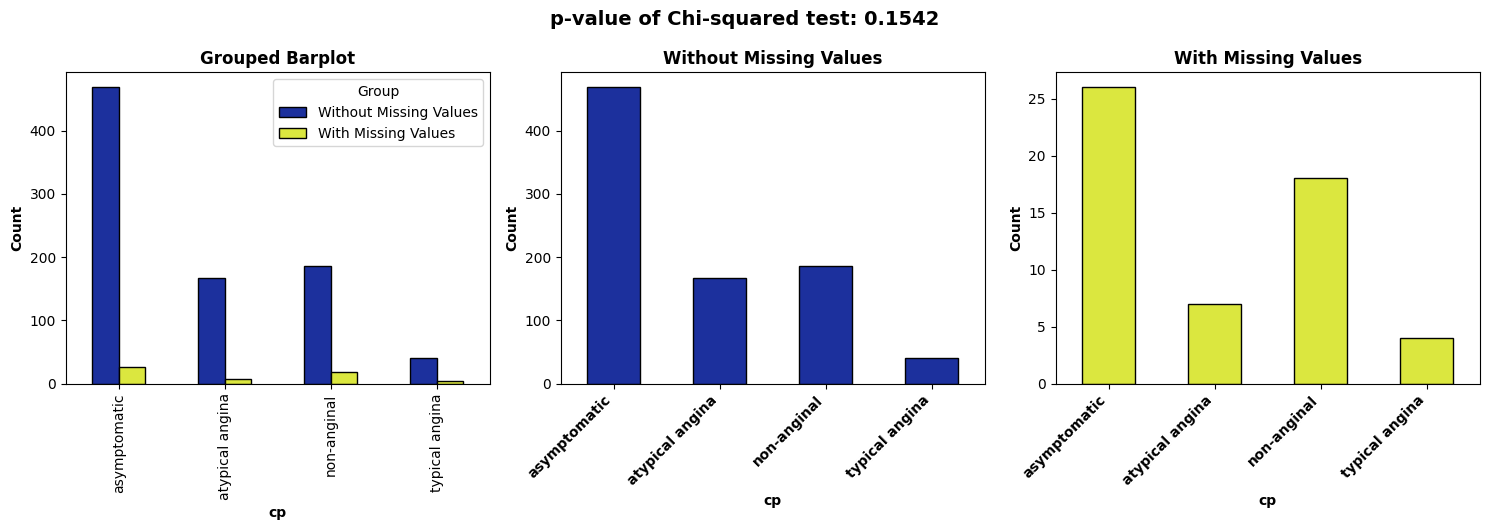

In [ ]:
# Variables categóricas a analizar
cat_vars = ['restecg', 'cp']

for col in cat_vars:
    print(f"\nAnálisis de '{col}' según presencia de valores faltantes en 'thalch':")
    Diagnose_MV_Categorical(cardio_df, col, thalch_na)

3. **Variable `restecg` (ECG en reposo)**

- **p-value Chi-squared**: 1.147e-09 (extremadamente significativo)
- **Conclusión**: Existe una asociación estadísticamente muy significativa entre los resultados del ECG en reposo y la presencia de valores faltantes en thalach
- **Interpretación**: Los pacientes con "st-t abnormality" son desproporcionadamente más propensos a tener valores faltantes en thalach

4. **Variable `cp` (Tipo de dolor de pecho)**

- **p-value Chi-squared**: 0.1542 (no significativo)
- **Conclusión**: No hay diferencia estadísticamente significativa en la distribución de tipos de dolor de pecho entre los grupos
- **Interpretación**: El tipo de dolor de pecho NO está relacionado con los valores faltantes en thalach

## Conclusión sobre el Mecanismo de Valores Faltantes:

El mecanismo de valores faltantes en `thalach` y por lo tanto en las filas con multiples columnas con valores faltantes es **MAR (Missing at Random)**.

### Justificación:

**Por que no es MCAR (Missing Completely at Random):**
- Los valores faltantes no son aleatorios
- Están claramente relacionados con variables observadas (`age` y `restecg`)

**Si es MAR (Missing at Random):**
- La probabilidad de que falte `thalach` depende de otras variables observadas:
  - **Edad avanzada**: Los pacientes mayores tienen mayor probabilidad de tener valores faltantes
  - **Anormalidades en ECG en reposo**: Especialmente "st-t abnormality" aumenta la probabilidad de valores faltantes

### Implicaciones para el Análisis:

1. **No eliminar registros**: Los valores faltantes contienen información valiosa sobre el perfil de riesgo del paciente
2. **Considerar variables predictoras**: Usar `age` y `restecg` para estrategias de imputación más sofisticadas

6. La imputación de una variable con valores faltantes puede realizarse por grupos o segmentos relevantes. Esto significa que, en lugar de utilizar una estadística global de toda la columna, se calcula la estadística correspondiente dentro de cada grupo definido por otra variable, haciendo:

> `df['var_with_missing'] = df.groupby('related_var')['var_with_missing'].transform(lambda x: x.fillna(x.median()))`

* Utiliza la variable `restecg` para separar los grupos e imputar `thalch` y todas las variables con patrón de faltantes similar (identificadas en el ejercicio 3) Asegúrate de cambiar la función de agregado si hay variables no numéricas.
* Vuelve a generar el mapa de calor para verificar que los valores faltantes en estas variables hayan sido imputados.

C:\Users\Carlos Galvan\AppData\Local\Temp\ipykernel_2024\1231910737.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cardio_df[col] = cardio_df.groupby('restecg')[col].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x))


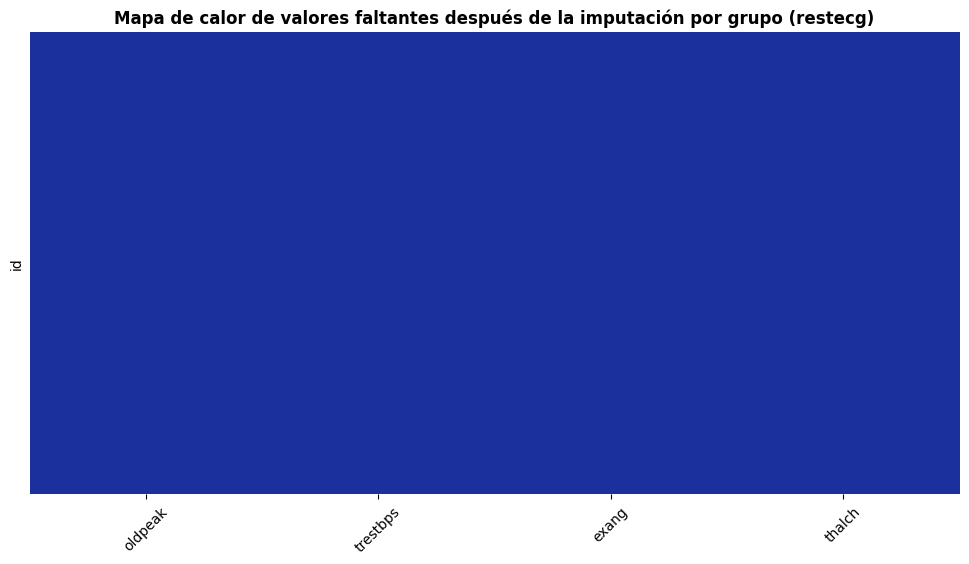

In [ ]:
# Imputación por grupos definidos por 'restecg'
cols_to_impute = ['oldpeak','trestbps','exang','thalch']

for col in cols_to_impute:
    # Si la variable es numérica, imputar con la mediana de su grupo
    if cardio_df[col].dtype.kind in 'biufc': # numérico
        cardio_df[col] = cardio_df.groupby('restecg')[col].transform(lambda x: x.fillna(x.median()))
    else:
        # Si es categórica/objeto, imputar con la moda de su grupo
        cardio_df[col] = cardio_df.groupby('restecg')[col].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x))

# Verificar con mapa de calor si quedan valores faltantes en esas variables usando los mismos colores y formato personalizados
base_colors = ['#1c309d', '#dbe73f']

plt.figure(figsize=(12, 6))
ax = sns.heatmap(
    cardio_df[cols_to_impute].isnull(),
    cbar=False,
    yticklabels=False,
    cmap=ListedColormap(base_colors),
    edgecolor='black'
)
plt.title("Mapa de calor de valores faltantes después de la imputación por grupo (restecg)", fontweight='bold')
plt.xticks(rotation=45)
plt.show()


7. Para las variables que aún presentan valores faltantes, realiza la imputación utilizando estadísticas generales calculadas sobre toda la columna, sin segmentar por grupos. Esta vez utiliza la clase `SimpleImputer` de sklearn
* Justifica la estrategia (*mean, median, most_frequent*) que emplees en cada caso.


Variables con valores faltantes: ['chol', 'fbs']
Imputación de 'chol' usando estrategia 'median' - valores faltantes restantes: 0
Imputación de 'fbs' usando estrategia 'most_frequent' - valores faltantes restantes: 0


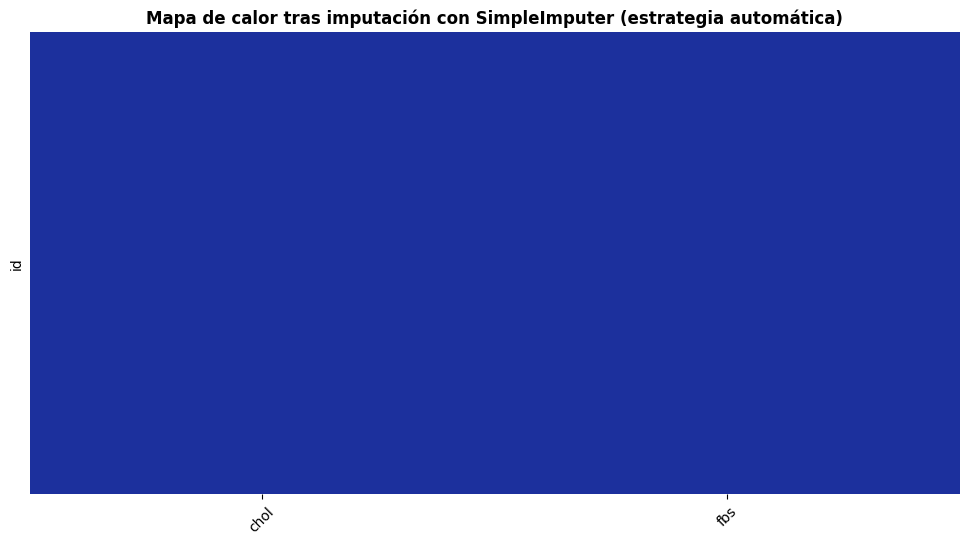

In [ ]:
# Identificamos variables con valores faltantes después de la imputación por grupo
missing_vars = cardio_df.columns[cardio_df.isnull().any()].tolist()
print("Variables con valores faltantes:", missing_vars)

for var in missing_vars:
    strategy = imputation_strategy(cardio_df[var])
    imp = SimpleImputer(strategy=strategy)
    cardio_df[[var]] = imp.fit_transform(cardio_df[[var]])
    print(f"Imputación de '{var}' usando estrategia '{strategy}' - valores faltantes restantes: {cardio_df[var].isnull().sum()}")

# Comprobamos en el mapa de calor final que ya no hay NaNs
plt.figure(figsize=(12, 6))
ax = sns.heatmap(
    cardio_df[missing_vars].isnull(),
    cbar=False,
    yticklabels=False,
    cmap=ListedColormap(base_colors),
    edgecolor='black'
)
plt.title("Mapa de calor tras imputación con SimpleImputer (estrategia automática)", fontweight='bold')
plt.xticks(rotation=45)
plt.show()


In [30]:
cardio_df.columns[cardio_df.isnull().any()].tolist()

[]

8. Dibuja boxplots de todas las variables numéricas.
* Obtén los valores atípicos mediante el método gráfico, a partir del objeto devuelto por el boxplot.

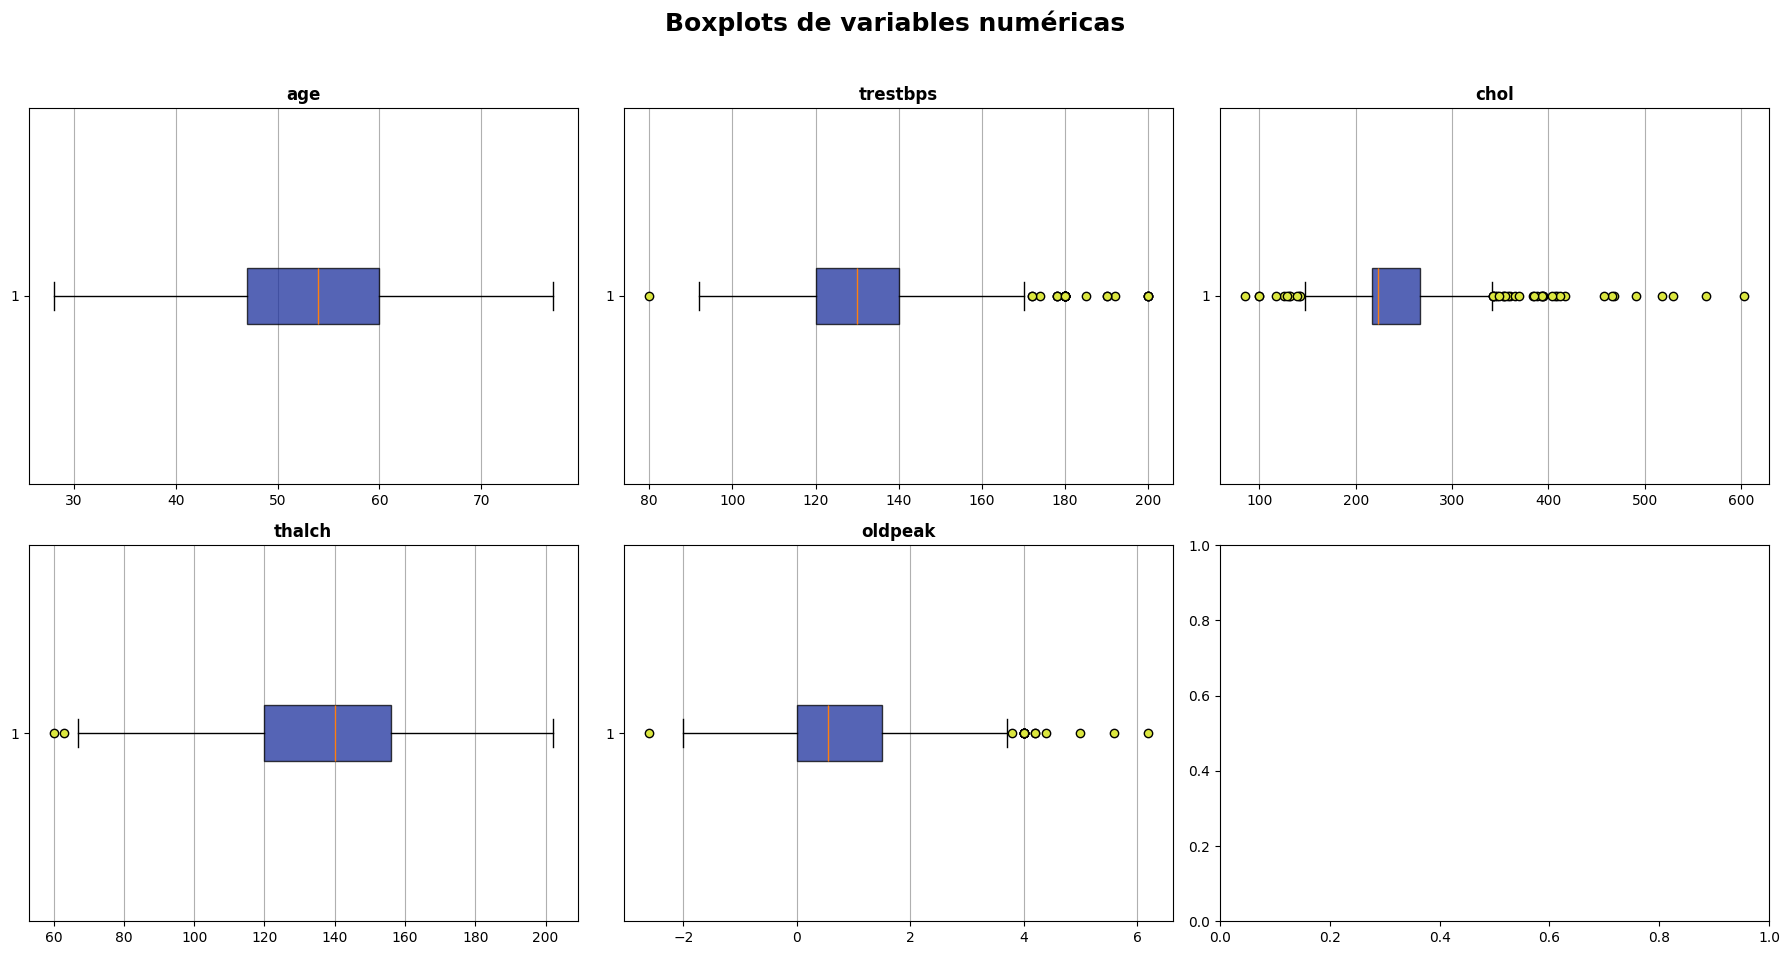

Valores atípicos en age (según boxplot): []
Valores atípicos en trestbps (según boxplot): [80.0, 172.0, 180.0, 200.0, 174.0, 178.0, 192.0, 180.0, 178.0, 180.0, 190.0, 180.0, 180.0, 180.0, 180.0, 200.0, 180.0, 180.0, 180.0, 200.0, 185.0, 200.0, 180.0, 178.0, 172.0, 180.0, 190.0]
Valores atípicos en chol (según boxplot): [141.0, 126.0, 131.0, 132.0, 129.0, 100.0, 85.0, 117.0, 100.0, 142.0, 139.0, 354.0, 353.0, 417.0, 360.0, 407.0, 564.0, 394.0, 409.0, 342.0, 358.0, 412.0, 468.0, 365.0, 344.0, 394.0, 347.0, 466.0, 529.0, 392.0, 355.0, 603.0, 342.0, 404.0, 518.0, 388.0, 491.0, 342.0, 393.0, 458.0, 384.0, 349.0, 369.0, 385.0]
Valores atípicos en thalch (según boxplot): [60.0, 63.0]
Valores atípicos en oldpeak (según boxplot): [-2.6, 6.2, 4.0, 5.6, 4.0, 4.2, 4.2, 3.8, 4.4, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0]


In [ ]:
# Boxplots para variables numéricas y extracción de outliers por método gráfico usando subplots
numeric_cols = cardio_df.select_dtypes(include='number').columns.tolist()

n_cols = 3
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

outliers_dict = {}

for idx, col in enumerate(numeric_cols):
    vals = cardio_df[col].dropna().values
    # Boxplot individual
    bp = axes[idx].boxplot(
        vals,
        vert=False,
        patch_artist=True,
        showfliers=True,
        boxprops=dict(facecolor='#1c309d', alpha=0.75),
        flierprops={'markerfacecolor': '#dbe73f', 'marker': 'o'}
    )
    axes[idx].set_title(f"{col}", fontweight='bold')
    axes[idx].grid(axis='x')

    # Extracción de valores atípicos ("fliers") de este boxplot
    fliers_data = []
    for line in bp['fliers']:
        fliers_vals = line.get_xdata()
        if fliers_vals is not None and len(fliers_vals) > 0:
            fliers_data.extend(fliers_vals.tolist())
    outliers_dict[col] = fliers_data

fig.suptitle("Boxplots de variables numéricas", fontweight="bold", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

# Mostrar outliers detectados
for col in numeric_cols:
    print(f"Valores atípicos en {col} (según boxplot): {outliers_dict[col]}")


9. Para la variable `trestbps`, calcula los valores atípicos utilizando el método del rango intercuartílico (IQR).
* Para ello obtén los cuartiles necesarios y determina los límites superior e inferior para filtrar los valores que se encuentren fuera de ese rango.
* Verifica si los resultados coinciden con los obtenidos en el ejercicio anterior.

In [40]:
# Calcular los valores atípicos de 'trestbps' usando el método IQR

# Elimina nulos sólo para el cálculo
trestbps_vals = cardio_df['trestbps'].dropna()

# Calcular Q1 y Q3
Q1 = trestbps_vals.quantile(0.25)
Q3 = trestbps_vals.quantile(0.75)
IQR = Q3 - Q1

# Determinar límites inferior y superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Límite inferior: {limite_inferior:.2f}")
print(f"Límite superior: {limite_superior:.2f}")

# Encontrar los valores atípicos con IQR
outliers_iqr = trestbps_vals[(trestbps_vals < limite_inferior) | (trestbps_vals > limite_superior)]
outliers_iqr_sorted = sorted(outliers_iqr.tolist())
print(f"Valores atípicos en 'trestbps' usando IQR: {outliers_iqr_sorted}")

# Outliers detectados por boxplot (sección anterior)
outliers_boxplot = sorted(outliers_dict.get('trestbps', []))
print("\nOutliers por boxplot (ejercicio anterior):")
print(outliers_boxplot)

# Comparación entre ambos métodos
iqr_set = set(outliers_iqr_sorted)
boxplot_set = set(outliers_boxplot)

# Elementos que están solo en IQR
solo_iqr = sorted(list(iqr_set - boxplot_set))
# Elementos que están solo en Boxplot
solo_boxplot = sorted(list(boxplot_set - iqr_set))
# Elementos que están en ambos
en_ambos = sorted(list(iqr_set & boxplot_set))

print("\nComparación entre IQR y Boxplot:")
print(f"Valores detectados solo por IQR: {solo_iqr}")
print(f"Valores detectados solo por boxplot: {solo_boxplot}")
print(f"Valores detectados por ambos métodos: {en_ambos}")


Q1: 120.00
Q3: 140.00
IQR: 20.00
Límite inferior: 90.00
Límite superior: 170.00
Valores atípicos en 'trestbps' usando IQR: [80.0, 172.0, 172.0, 174.0, 178.0, 178.0, 178.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 185.0, 190.0, 190.0, 192.0, 200.0, 200.0, 200.0, 200.0]

Outliers por boxplot (ejercicio anterior):
[80.0, 172.0, 172.0, 174.0, 178.0, 178.0, 178.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 180.0, 185.0, 190.0, 190.0, 192.0, 200.0, 200.0, 200.0, 200.0]

Comparación entre IQR y Boxplot:
Valores detectados solo por IQR: []
Valores detectados solo por boxplot: []
Valores detectados por ambos métodos: [80.0, 172.0, 174.0, 178.0, 180.0, 185.0, 190.0, 192.0, 200.0]


10. Elimina los valores atípicos identificados de la variable `trestbps`.
* Dibuja el boxplot final para visualizar la distribución depurada.

Filas originales: 918
Filas después de eliminar outliers de 'trestbps': 891


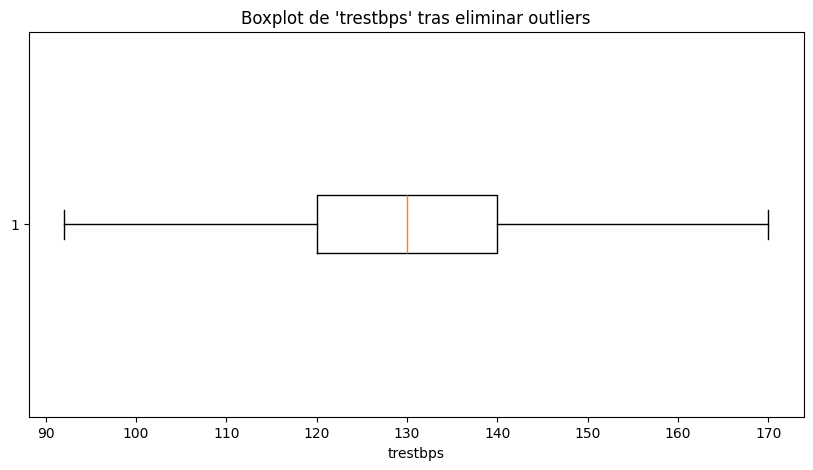

In [ ]:
# Eliminar los valores atípicos identificados de 'trestbps'
# Usaremos el set de valores atípicos encontrados tanto por IQR como por boxplot (unión de ambos métodos)
valores_atipicos = sorted(list(iqr_set | boxplot_set))

# Crear una máscara para filtrar los outliers de 'trestbps'
mascara_sin_outliers = ~cardio_df['trestbps'].isin(valores_atipicos)
cardio_df_sin_outliers = cardio_df[mascara_sin_outliers].copy()

print(f"Filas originales: {cardio_df.shape[0]}")
print(f"Filas después de eliminar outliers de 'trestbps': {cardio_df_sin_outliers.shape[0]}")

# Dibuja el boxplot final para 'trestbps' sin los outliers
plt.figure(figsize=(10, 5))
plt.boxplot(cardio_df_sin_outliers['trestbps'].dropna(), vert=False)
plt.title("Boxplot de 'trestbps' tras eliminar outliers")
plt.xlabel('trestbps')
plt.show()
